# Kidney organoid gene and TF stream tree feature plots 

In [1]:
import phlower
import pickle
import scanpy as sc

In [2]:
!mkdir save
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle -O save/multiome_phlower.pickle
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 -O save/multiome_chromvar.h5

2025-11-12 14:33:21 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle [4365968492/4365968492] -> "save/multiome_phlower.pickle" [1]
2025-11-12 14:33:22 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 [73101100/73101100] -> "save/multiome_chromvar.h5" [1]


## Load kidney organoid phlower tree adata with scRNA-seq counts and tf activity data

In [3]:
## load adata with scRNA-seq counts
f = "save/multiome_phlower.pickle"
adata = pickle.load(open(f, "rb"))

## load tf activity anndata
tfbdata = sc.read_10x_h5("save/multiome_chromvar.h5")
tfbdata.var_names = [i.upper() for i in tfbdata.var_names]

assert(all(tfbdata.obs_names == adata.obs_names))

## obtain all phlower tree information from adata
import copy
tfbdata.obs = copy.deepcopy(adata.obs)
tfbdata.obsm = copy.deepcopy(adata.obsm)
tfbdata.uns = copy.deepcopy(adata.uns)

## Plot PAX3 and GRHL2 TF activities

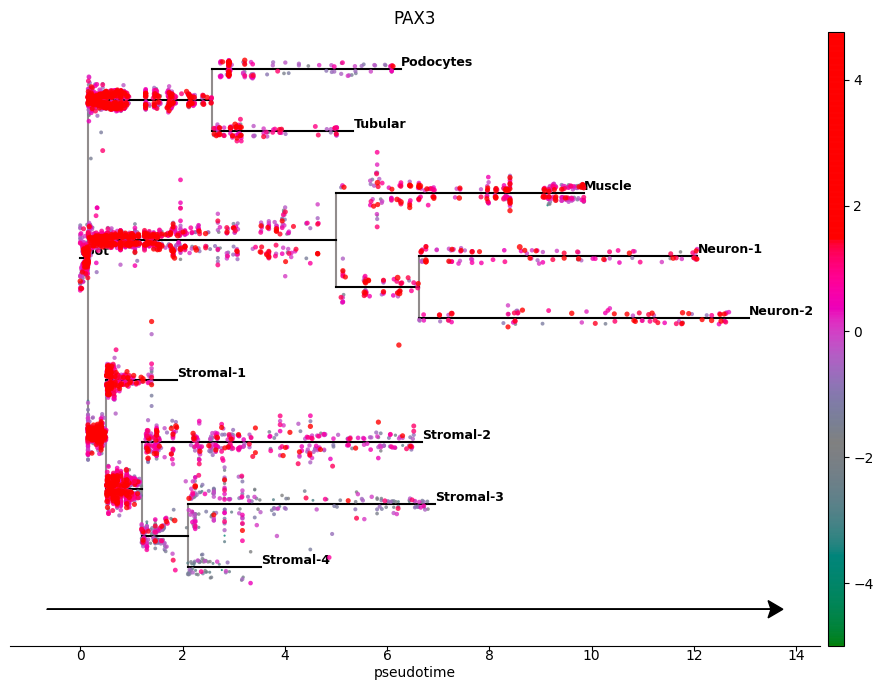

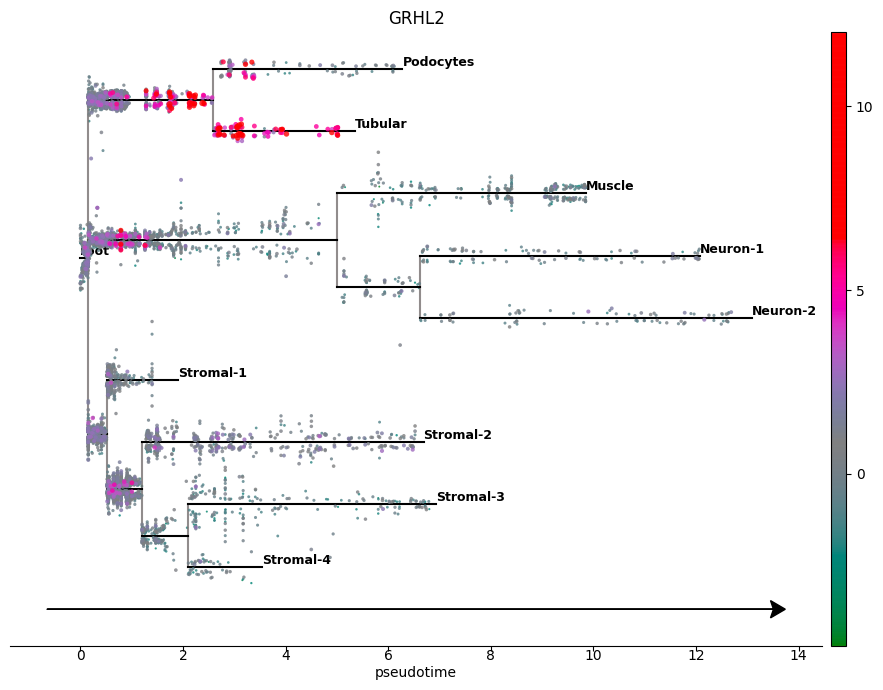

In [4]:
greengrey2red = phlower.custom_cmap(['green', 'grey', 'red', 'red'])
anno_dic = { 
    9:  "Podocytes",
    1:  "Tubular",
    6:  "Muscle",
    13: "Neuron-1",
    0:  "Neuron-2",
    7:  "Stromal-1",
    8:  "Stromal-2",
    5:  "Stromal-3",
    11: "Stromal-4",
}
preference_order =  {"original": list(anno_dic.values())} ## order of tree branches
phlower.ext.plot_stream_sc(tfbdata, color=['PAX3', 'GRHL2'],
                                      return_fig=False, ## Return figure list if True
                                      show_text=True,
                                      text_attr='original',
                                      show_graph=True,
                                      show_legend=True,
                                      preference=preference_order,
                                      fig_size=(9,7),
                                      s=(2, 20), ## points size according tf activity
                                      alpha=0.8,
                                      dist_scale=.4,
                                      cmap_continous=greengrey2red)

## preprocess of scRNA-seq data and imputation with magic (https://www.cell.com/cell/fulltext/S0092-8674(18)30724-4)

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
phlower.tl.magic_adata(adata)


Calculating MAGIC...
  Running MAGIC on 13751 cells and 36601 genes.
  Calculating graph and diffusion operator...


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculating PCA...
    Calculated PCA in 27.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 19.87 seconds.
    Calculating affinities...
    Calculated affinities in 20.63 seconds.
  Calculated graph and diffusion operator in 68.52 seconds.
  Running MAGIC with `solver='exact'` on 36601-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 241.02 seconds.
Calculated MAGIC in 348.50 seconds.


## Plot PAX3 and GRHL2 gene expression

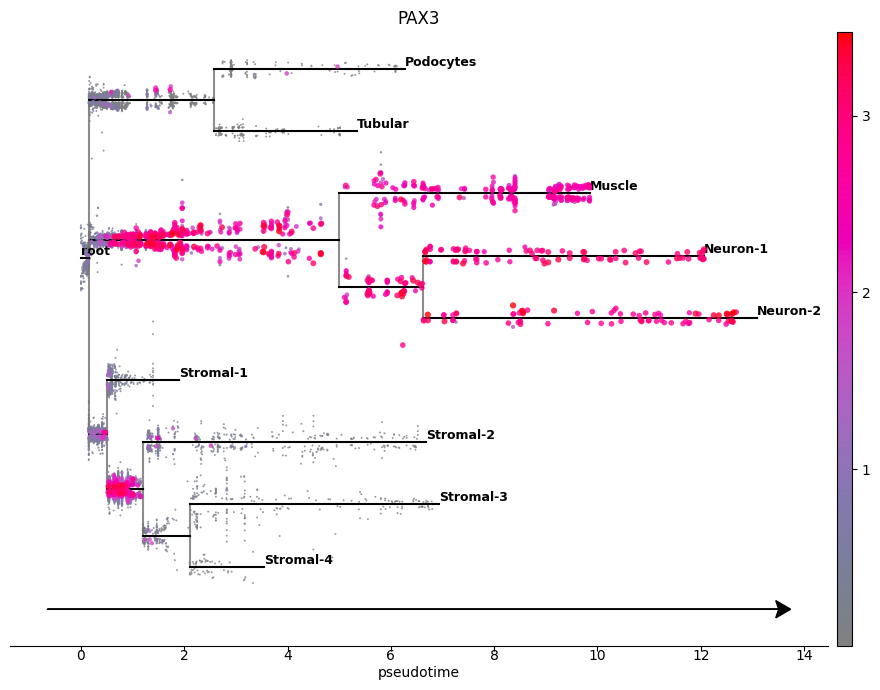

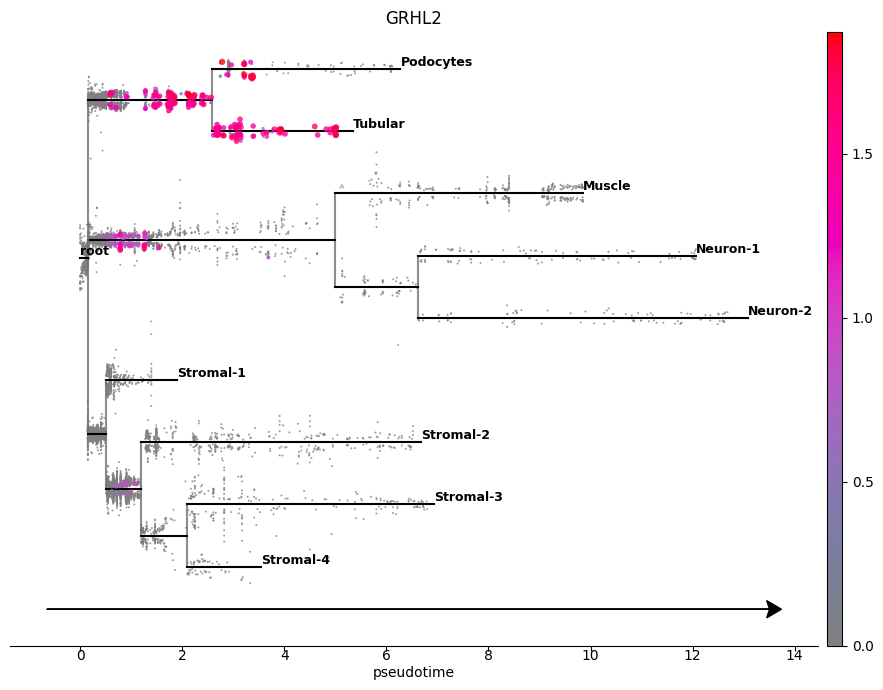

In [6]:
grey2red = phlower.custom_cmap(['grey', 'red'])
phlower.ext.plot_stream_sc(adata, color=['PAX3', "GRHL2"],
                                      return_fig=False,
                                      show_text=True,
                                      text_attr='original',
                                      show_graph=True,
                                      show_legend=True,
                                      preference=preference_order,
                                      fig_size=(9,7),
                                      s=(2,20),
                                      alpha=0.8,
                                      dist_scale=.4,
                                      cmap_continous=grey2red)


In [7]:
import session_info
session_info.show()